# 1.데이터 소개


## 1-1. 컬럼 설명

  * **hotel** - city hotel, resort hotel 둘 중 하나
  * **is_canceled** - 취소 유무. 예측해줘야 할 타겟값
  * **lead_time** - 예약시점으로부터 호텔 체크인하는 날까지의 기간. 얼마나 미리 예약했는지 알 수 있다.
  * **arrival_date_year** - 도착 연도
  * **arrival_date_month** - 도착 월
  * **arrival_date_week_number** - 1년을 주 단위로 나눴을 때 몇번쨰 주에 도착했나?
  * **arrival_date_day_of_month** - 도착 일
  * **stays_in_weekend_nights** - 주말 몇박 묵고 가는지?
  * **stays_in_week_nights** - , 평일 몇박 묵고 가는지?
  * **adults** - 성인 수
  * **children** - 아이 수
  * **babies** - 아기 수
  * **meal** - 식사(BB)
  * **country** - 해당 국가 정보
  * **distribution_channel** - 어떤 채널로 예약했는지
    * Direct : 직접
    * Coporate : 기업을 통해
    * TA/TO : 호텔예약 도와주는 웹사이트를 통해서
  * **is_repeated_guest** - 기존에 예약한 적 있는 고객인지?
  * **previous_cancellations** - 이전에 취소한 적이 있는지?
  * **previous_bookings_not_canceled** - 취소가 안된 예약 내역이 있었는지?
  * **reserved_room_type** - 희망한 룸 타입.
  * **assigned_room_type** - 할당한 룸 타입.
  * **booking_changes** - 예약 변경을 몇번 했는지?
  * **deposit_type** - No Deposit
  * **days_in_waiting_list** - waiting_list에 몇일이나 있었는지?
  * **customer_type** - 고객 타입 ( Transient : 일반 고객 )
  * **adr** - average daily rate
  * **required_car_parking_spaces** - 주차공간을 요구 했는지?
  * **total_of_special_requests** - 특별한 요청 사항 있는지?
  * **reservation_status_date** - 예약관련 상태 업데이트가 된 날짜
  * **name** - 고객 이름
  * **email** - 고객 이메일
  * **phone-number** - 고객 전화번호
  * **credit_card** -  고객 신용카드 번호

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
#pip install -U kaleido

## 1-2. 탐색적(EDA) 분석

In [219]:
hotel_df = pd.read_csv('/content/hotel.csv')

In [220]:
pd.set_option('display.max_columns', 50)

In [221]:
print(hotel_df.shape)
hotel_df.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [222]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,151.20,0,2,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [223]:
hotel_df['country'].value_counts()[:10]

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64

In [224]:
# 분석에 무의미할 변수들 삭제
hotel_df.drop(['arrival_date_day_of_month','arrival_date_week_number','reservation_status_date','name','email','phone-number','credit_card'], axis=1,inplace=True)

In [225]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119386 non-null  float64
 9   babies                          119390 non-null  int64  
 10  meal                            119390 non-null  object 
 11  country                         118902 non-null  object 
 12  distribution_cha

In [226]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<ipython-input-227-9dd667034522>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=hotel_df['lead_time'])


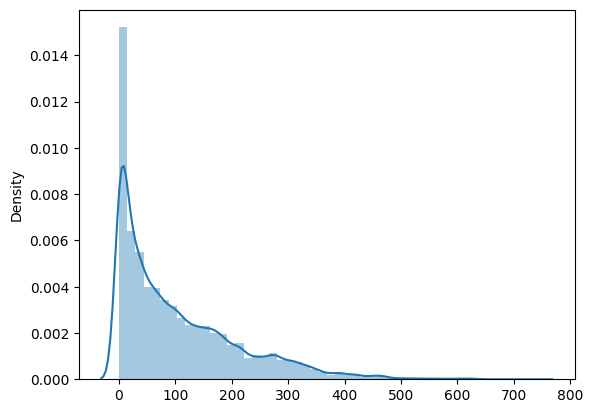

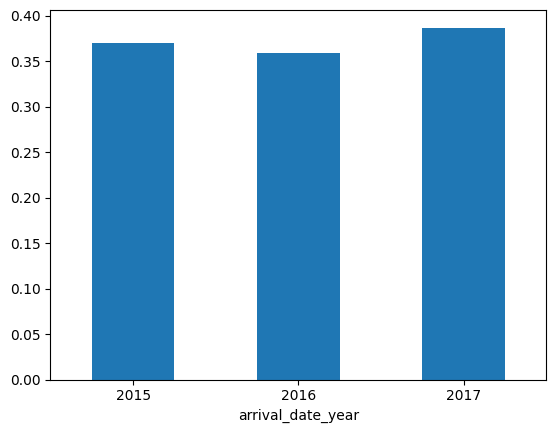

In [227]:
# @title
hotel_df['is_canceled'].value_counts()
# @title
sns.distplot(x=hotel_df['lead_time'])
plt.show()
# @title
#연도별 취소율
hotel_df.groupby(['arrival_date_year'])['is_canceled'].mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Axes: ylabel='lead_time'>

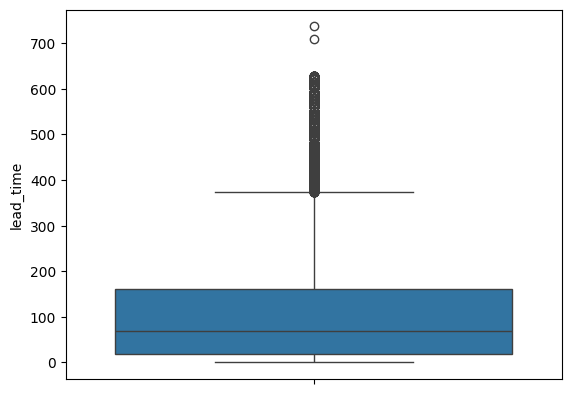

In [228]:
sns.boxplot(y = hotel_df['lead_time'])

In [229]:
hotel_df = hotel_df[hotel_df['adr'] >= 0]

<Axes: xlabel='distribution_channel', ylabel='is_canceled'>

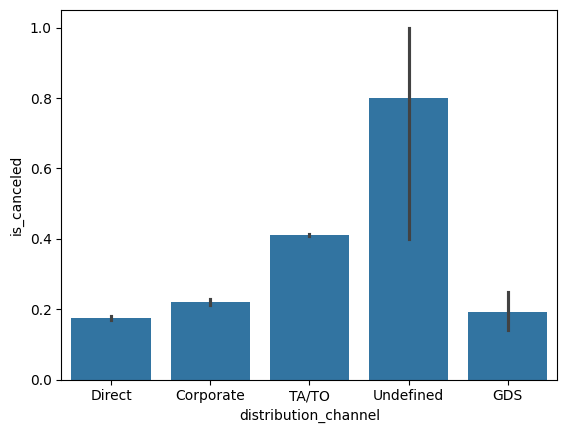

In [230]:
sns.barplot(x=hotel_df['distribution_channel'], y= hotel_df['is_canceled'])

In [231]:
#애러바가 길게 나타나는 이유? 데이터가 별로 없을 때 나타나는 현상 -> 유의미한 정보라고 볼수 없다.
hotel_df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14644
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

<Axes: xlabel='hotel', ylabel='is_canceled'>

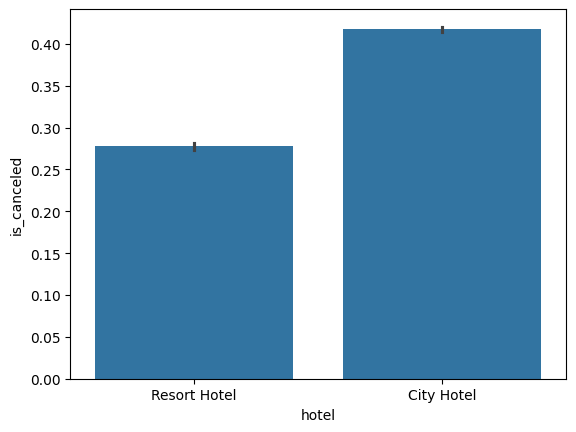

In [232]:
sns.barplot( x = hotel_df['hotel'], y = hotel_df['is_canceled'] )

<Axes: xlabel='arrival_date_year', ylabel='is_canceled'>

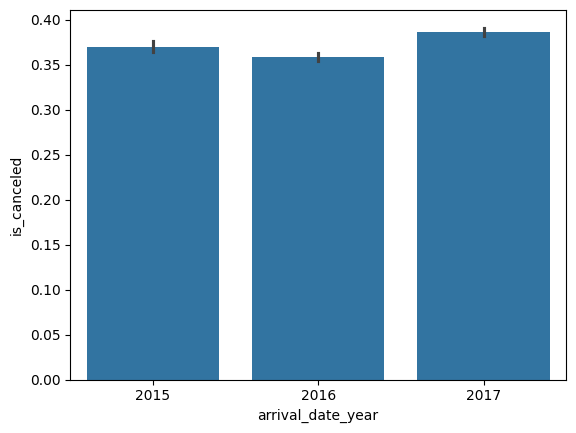

In [233]:
sns.barplot( x = hotel_df['arrival_date_year'], y= hotel_df['is_canceled'] )

In [234]:
import calendar

In [235]:
months = []

for i in range(1, 13):
    #print(calendar.month_name[i])
    months.append(calendar.month_name[i])

<Axes: xlabel='arrival_date_month', ylabel='is_canceled'>

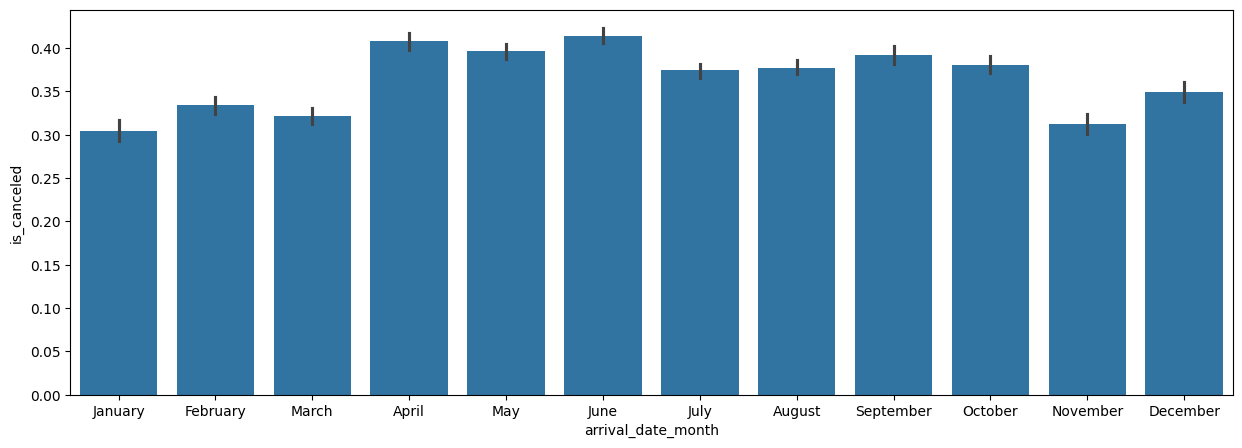

In [236]:
plt.figure(figsize=(15,5))
sns.barplot( x = hotel_df['arrival_date_month'], y=hotel_df['is_canceled'], order = months)

<Axes: xlabel='is_repeated_guest', ylabel='is_canceled'>

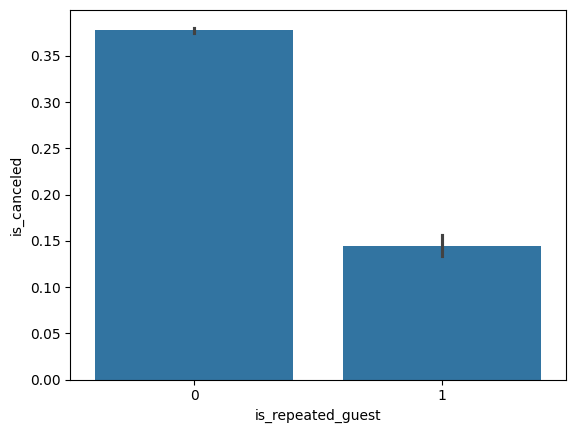

In [237]:
sns.barplot(x=hotel_df['is_repeated_guest'], y=hotel_df['is_canceled'])

<Axes: xlabel='deposit_type', ylabel='is_canceled'>

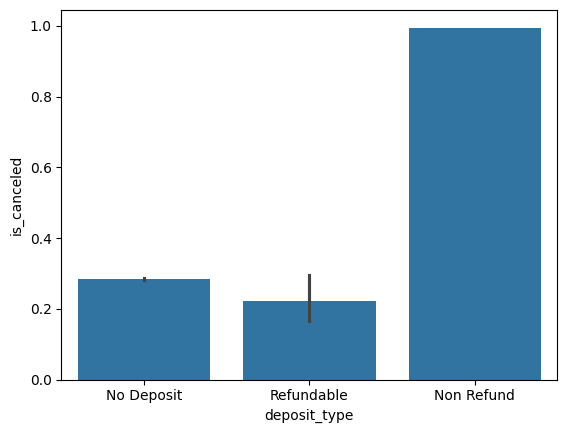

In [238]:
sns.barplot( x = hotel_df['deposit_type'],y = hotel_df['is_canceled'])

In [239]:
hotel_df['deposit_type'].value_counts()

deposit_type
No Deposit    104640
Non Refund     14587
Refundable       162
Name: count, dtype: int64

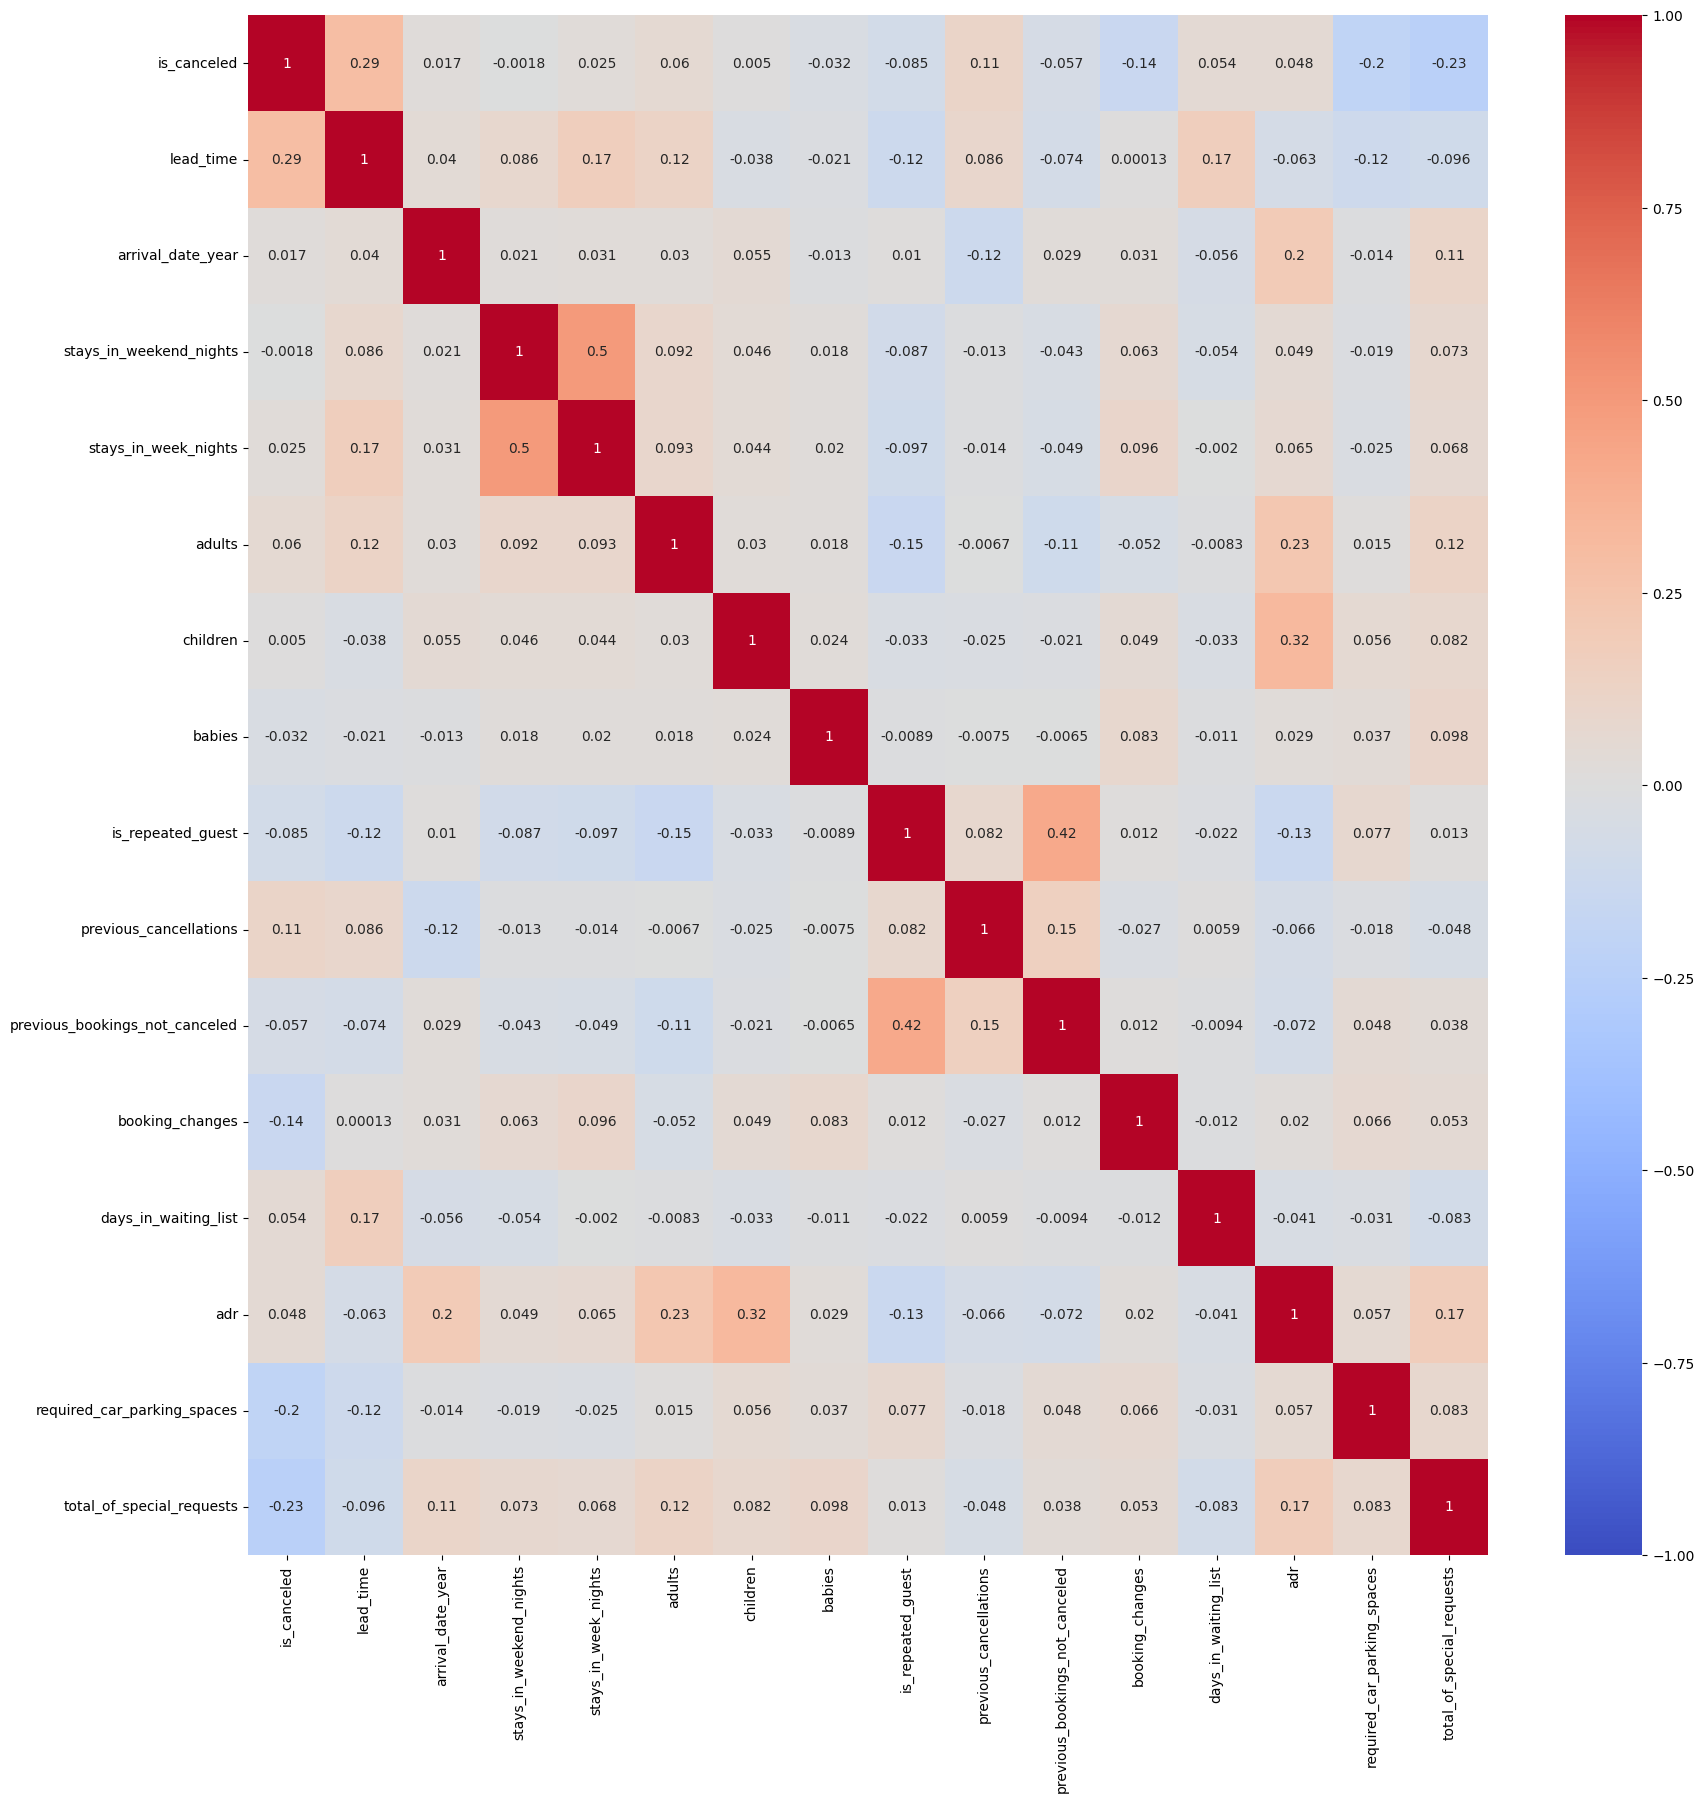

In [240]:
plt.figure(figsize=(20,20))
sns.heatmap(hotel_df.select_dtypes(exclude = 'object').corr(), cmap='coolwarm', vmax=1, vmin=-1, annot=True)
plt.show()

## 1-3. 결측치 처리

In [241]:
hotel_df.isna().mean()

hotel                             0.000000
is_canceled                       0.000000
lead_time                         0.000000
arrival_date_year                 0.000000
arrival_date_month                0.000000
stays_in_weekend_nights           0.000000
stays_in_week_nights              0.000000
adults                            0.000000
children                          0.000034
babies                            0.000000
meal                              0.000000
country                           0.004087
distribution_channel              0.000000
is_repeated_guest                 0.000000
previous_cancellations            0.000000
previous_bookings_not_canceled    0.000000
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_ca

In [242]:
hotel_df = hotel_df.dropna()

In [243]:
hotel_df[hotel_df['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2224,Resort Hotel,0,1,2015,October,0,3,0,0.0,0,SC,PRT,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0
2409,Resort Hotel,0,0,2015,October,0,0,0,0.0,0,SC,PRT,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0
3181,Resort Hotel,0,36,2015,November,1,2,0,0.0,0,SC,ESP,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0
3684,Resort Hotel,0,165,2015,December,1,4,0,0.0,0,SC,PRT,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0
3708,Resort Hotel,0,165,2015,December,2,4,0,0.0,0,SC,PRT,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,1,3,0,2.0,0,BB,GBR,TA/TO,0,0,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117274,City Hotel,0,276,2017,July,2,1,0,2.0,0,BB,DEU,TA/TO,0,0,0,B,B,1,No Deposit,0,Transient,93.64,0,2
117303,City Hotel,0,291,2017,July,2,2,0,2.0,0,BB,PRT,TA/TO,0,0,0,B,A,0,No Deposit,0,Transient,98.85,0,1
117453,City Hotel,0,159,2017,July,1,3,0,2.0,0,SC,FRA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,121.88,0,1


## 1-4 피처 엔지니어링

In [244]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0


성인 + 어린이 + 아기 명수 데이터를 합쳐서 총 인원 컬럼 생성

In [245]:
hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']

<ipython-input-245-7b8904ba1394>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['people'] = hotel_df['adults'] + hotel_df['children'] + hotel_df['babies']


In [246]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0


In [247]:
hotel_df[hotel_df['people']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people
2224,Resort Hotel,0,1,2015,October,0,3,0,0.0,0,SC,PRT,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,0.0
2409,Resort Hotel,0,0,2015,October,0,0,0,0.0,0,SC,PRT,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,0.0
3181,Resort Hotel,0,36,2015,November,1,2,0,0.0,0,SC,ESP,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,0.0
3684,Resort Hotel,0,165,2015,December,1,4,0,0.0,0,SC,PRT,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,0.0
3708,Resort Hotel,0,165,2015,December,2,4,0,0.0,0,SC,PRT,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,0,3,0,0.0,0,BB,CHE,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,0.0
115091,City Hotel,0,1,2017,June,0,1,0,0.0,0,SC,PRT,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,0.0
116251,City Hotel,0,44,2017,July,1,1,0,0.0,0,SC,SWE,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,0.0
116534,City Hotel,0,2,2017,July,2,5,0,0.0,0,SC,RUS,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,0.0


In [248]:
hotel_df[hotel_df['people']==0].shape

(170, 26)

people 컬럼인 0명인 데이터가 있다? 잘못된 데이터로 보이며, 총 12만개 데이터 중에 170개 밖에 안되므로 삭제하는 게 좋을 것 같다.

In [249]:
hotel_df = hotel_df[hotel_df['people']!=0]

In [250]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0


평일과 주말 숙박일자를 합쳐서 전체 숙박일자 컬럼 생성

In [251]:
hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']

<ipython-input-251-edd249f3295e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights']


In [252]:
hotel_df[hotel_df['total_nights'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0
167,Resort Hotel,0,111,2015,July,0,0,2,0.0,0,BB,PRT,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,2.0,0
168,Resort Hotel,0,0,2015,July,0,0,1,0.0,0,BB,PRT,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,1.0,0
196,Resort Hotel,0,8,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,0,0,1,0.0,0,SC,FRA,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,1.0,0
117701,City Hotel,0,0,2017,August,0,0,2,0.0,0,BB,PRT,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118029,City Hotel,0,0,2017,August,0,0,2,0.0,0,BB,PRT,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,2.0,0
118631,City Hotel,0,78,2017,August,0,0,1,0.0,0,BB,PRT,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,1.0,0


arrival_date_month 컬럼을 통해 계절을 나타내는 새 컬럼 만들기

In [253]:
hotel_df['arrival_date_month'].apply(lambda x: 'spring' if x in ['March','April','May'] else 'summer' if x in ['June','July','August'] else 'fall' if x in ['September','October','November'] else 'winter')

0         summer
1         summer
2         summer
3         summer
4         summer
           ...  
119385    summer
119386    summer
119387    summer
119388    summer
119389    summer
Name: arrival_date_month, Length: 118727, dtype: object

In [254]:
season_dic = {'spring':[3,4,5],'summer':[6,7,8],'fall':[9,10,11],'winter':[12,1,2]}

In [255]:
new_season_dic = {}

for i in season_dic:
    for j in season_dic[i]:
        new_season_dic[calendar.month_name[j]] = i

In [256]:
new_season_dic

{'March': 'spring',
 'April': 'spring',
 'May': 'spring',
 'June': 'summer',
 'July': 'summer',
 'August': 'summer',
 'September': 'fall',
 'October': 'fall',
 'November': 'fall',
 'December': 'winter',
 'January': 'winter',
 'February': 'winter'}

In [257]:
hotel_df['season'] = hotel_df['arrival_date_month'].map(new_season_dic)

예약된 룸타입과 할당된 룸타입이 같은지 확인하는 Boolen타입의 새컬럼 만들기

In [258]:
hotel_df['expected_room_type'] = (hotel_df['reserved_room_type'] == hotel_df['assigned_room_type']).astype('int')

In [259]:
# 2/2 = 100%
# 5/50 - 10%

이전 예약했던 데이터를 통해 예약 취소율 컬럼 생성

In [260]:
hotel_df['cancel_rate'] = hotel_df['previous_cancellations'] / (hotel_df['previous_cancellations'] + hotel_df['previous_bookings_not_canceled'])

In [261]:
hotel_df[hotel_df['cancel_rate'] > 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights,season,expected_room_type,cancel_rate
13825,Resort Hotel,0,6,2016,March,1,0,1,0.0,0,BB,PRT,Corporate,0,1,1,A,A,0,No Deposit,0,Transient,40.0,0,0,1.0,1,spring,1,0.500000
13826,Resort Hotel,0,7,2016,June,0,1,1,0.0,0,BB,PRT,Corporate,0,1,2,A,A,0,No Deposit,0,Transient,65.0,0,0,1.0,1,summer,1,0.333333
13827,Resort Hotel,0,8,2016,September,0,2,2,0.0,0,BB,PRT,Corporate,0,1,3,A,A,0,No Deposit,0,Transient,65.0,0,0,2.0,2,fall,1,0.250000
13855,Resort Hotel,0,5,2015,November,0,1,1,0.0,0,BB,PRT,Corporate,0,1,1,A,A,0,No Deposit,0,Transient,25.0,0,0,1.0,1,fall,1,0.500000
13856,Resort Hotel,0,0,2015,December,0,1,1,0.0,0,BB,PRT,Corporate,0,1,2,A,A,0,No Deposit,0,Transient,25.0,0,0,1.0,1,winter,1,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111356,City Hotel,0,10,2017,June,0,1,1,0.0,0,BB,PRT,Corporate,1,1,4,A,A,0,No Deposit,0,Transient,65.0,0,0,1.0,1,summer,1,0.200000
111357,City Hotel,0,20,2017,July,0,3,1,0.0,0,BB,PRT,Corporate,1,1,5,A,A,0,No Deposit,0,Transient,65.0,0,0,1.0,3,summer,1,0.166667
111358,City Hotel,0,8,2017,July,0,1,1,0.0,0,BB,PRT,Corporate,1,1,6,A,A,0,No Deposit,0,Transient,65.0,1,0,1.0,1,summer,1,0.142857
111359,City Hotel,0,13,2017,August,0,1,1,0.0,0,BB,PRT,Corporate,1,1,7,A,A,0,No Deposit,0,Transient,65.0,0,0,1.0,1,summer,1,0.125000


In [262]:
hotel_df['cancel_rate'] = hotel_df['cancel_rate'].fillna(-99)

In [263]:
hotel_df['cancel_rate']

0        -99.0
1        -99.0
2        -99.0
3        -99.0
4        -99.0
          ... 
119385   -99.0
119386   -99.0
119387   -99.0
119388   -99.0
119389   -99.0
Name: cancel_rate, Length: 118727, dtype: float64

# 2.데이터 분석

## 2-1.문제 정의
고객들의 예약 취소 케이스와 개선할 부분이 궁금해요.

## 배경과 목적을 고려하여 새로 정의한 문제정의의 예
지난 2년 간 이용한(2017년 8월 기준) 고객들의 호텔 예약 취소 유무 현황과 원인을 파악하고 개선할 부분이 궁금해요.

## 분석을 위해 새로 정의한 문제정의의 예
지난 2년 간 이용한(2017년 8월 기준) 고객들의 호텔 예약 취소 유무 현황 중 입실일자 기준 한달 이내로 예약한 고객과 한달보다도 전에 예약한 고객의 취소 원인의 차이는 무엇인가?

## 2-2.가설 설정
1. 입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해
 기존에 예약했던 고객의 비율이 높을 것이다.
2. 입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해  희망한 룸타입과 할당된 룸타입이 다른 경우의 비율 더 많을 것이다.
3. 입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해 호텔예약 도와주는 웹사이트를 통해서 예약한 사람들의 비율이 더 많을 것이다.
4. 입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해 예약 변경한 고객의 비율이 많을 것이다.

### 가설 1 검정

**입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해
 기존에 예약했던 고객이 많을 것이다.**

In [264]:
hotel_df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,people,total_nights,season,expected_room_type,cancel_rate
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,2.0,0,summer,1,-99.0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,2.0,0,summer,1,-99.0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,1.0,1,summer,0,-99.0


In [265]:
hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1)]['is_repeated_guest'].mean()

0.03723404255319149

In [266]:
hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1)]['is_repeated_guest'].mean()

0.007676920581715954

*** 가설1 검점**

* 30일 이내에 예약한 취소 고객 중 기존에 예약한 적 있었던 고객 비율이 3.72%로 그렇지 않은 취소 고객의 0.76% 보다 높으므로 가설 1은 참이다.


**Q.어떻게 하면 예약 취소를 줄일 수 있을까?**


30일 이내의 예약한 손님의 취소 비율이 월등히 높으므로, 여기에 대한 정확한 원인 파악이 필요할 것으로 보임. 예를 들어, 취소 사유를 묻는 설문조사 실시

30일 이전에 예약한 고객은 취소를 잘 하지 않는다. 따라서 30일 이내 예약 손님에 대해서 취소 원인을 파악을 개선 요망.

### 가설 2 검정

**입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해 희망한 룸타입과 할당된 룸타입이 다른 경우의 비율 더 많을 것이다.**

In [267]:
1 - hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1)]['expected_room_type'].mean()

0.052491601343784944

In [268]:
1 - hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1)]['expected_room_type'].mean()

0.011272098178082945

*** 가설2 검점**

* 입실일자 기준 한달 이내로 예약한 취소고객의 희망한 룸타입과 할당된 룸타입이 다른 경우 5.25% 반대의 경우는 1.12%로 이 가설은 참이다.

**Q.어떻게 하면 예약 취소를 줄일 수 있을까?**

희망한 룸타입과 할당된 룸타입이 다른 경우 명확히 취소율이 높아진다. 이를 막기 위해서는 다른 타입으로 방배정된 고객에 대해 적절한 배상이나 소정의 선물을 드려보자.


### 가설 3 검정

**입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해 호텔예약 도와주는 웹사이트를 통해서 예약한 사람들의 비율이 더 많을 것이다.**

In [274]:
reserv_web = len(hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1)&(hotel_df['distribution_channel']=='TA/TO')])
reserv_tot = len(hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1)])

reserv_web/reserv_tot

0.7736562150055991

In [275]:
reserv_web = len(hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1)&(hotel_df['distribution_channel']=='TA/TO')])
reserv_tot = len(hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1)])

reserv_web/reserv_tot

0.9346921122344164

*** 가설3 검정**

* 입실일자 기준 한달 이내로 예약한 취소고객의 웹사이트로 예약한 비율은 77.3%이며, 그렇지 않은 최소고객의 웹사이트 예약 비율은 93.4%로 더 높다. 따라서 가설3은 거짓이다.

**Q.어떻게 하면 예약 취소를 줄일 수 있을까?**

30일 이전에 취소 고객이 상대적으로 더 많으나, 77.3%와 93.4%면 두가지 경우 모두 높은 비율을 나타낸다. 30일 기준을 뗴어놓고 생각할 필요가 있어보인다.

### 가설 4 검정

**입실일자 기준 한달 이내로 예약한 취소고객들은 그렇지 않은 최소고객에 비해 예약 변경한 고객의 비율이 많을 것이다.**

In [288]:
book_chg = len(hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1) & (hotel_df['booking_changes']!= 0)])
ttal = len(hotel_df.loc[(hotel_df['lead_time']<=30) & (hotel_df['is_canceled']==1)])

book_chg / ttal

0.06872900335946248

In [287]:
book_chg = len(hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1) & (hotel_df['booking_changes']!= 0)])
ttal = len(hotel_df.loc[(hotel_df['lead_time']>30) & (hotel_df['is_canceled']==1)])

book_chg / ttal

0.06303724928366762

*** 가설4 검정**

* 입실일자 기준 한달 이내로 예약한 취소고객의 예약을 변경한 고객의 비율은 6.87%이며, 그렇지 않은 최소고객의 변경 고객의 비율은 6.3%로 근소하게 더 높다. 따라서 가설4은 참이다.

**Q.어떻게 하면 예약 취소를 줄일 수 있을까?**

한달 이내이든 이전이든 같은 6%대로 비율상으로 큰 차이를 보이지 않는다. 예약 변경한 고객에 대해 변경 사유를 파악하고 이에 따른 대처를 변경사례를 줄인다면 취소율을 줄일 수 있을 것으로 보인다.